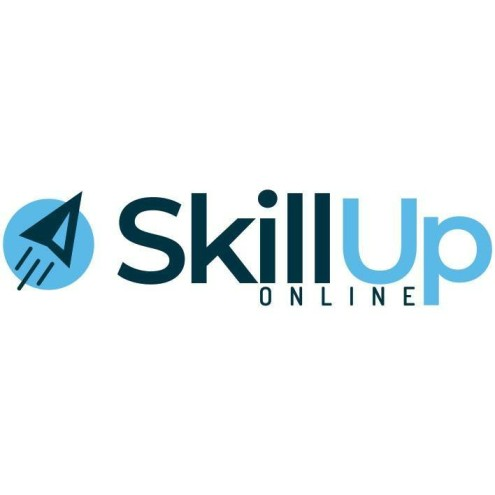
# **Project 2 - Bit Coin Prices - Part 6 - Model Development & Evaluation**

Dataset Link: https://www.kaggle.com/datasets/chakradharmattapalli/bitcoin-prices

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Import and read dataset

In [2]:
#Write Your Code Here
df=pd.read_csv('bitcoin_prices2.csv')
df.head()

,open,high,low,close,tick_volume,year,month,day
0,5.26,5.47,4.80,5.21,69150,2012,1,2
1,5.22,5.29,4.65,4.88,125170,2012,1,3
2,4.88,5.70,4.75,5.57,131170,2012,1,4
3,5.57,7.22,5.57,6.94,182328,2012,1,5
4,6.95,7.21,6.13,6.70,218077,2012,1,6



<details><summary><b>Click Here for the Hint</b></summary>

 

```
Start by importing the pandas library: import pandas as pd
    
Use the read_csv() function to load the CSV file into a pandas DataFrame. Specify the file path in the parentheses, for example: pd.read_csv("file_path.csv")
    
Assign the resulting DataFrame to a variable name, for example: data = pd.read_csv("file_path.csv")
    
Use the head() method on the DataFrame to display the first 10 rows, for example: data.head(10)
    
Make sure to replace "file_path.csv" with the actual file path and name of your CSV file.

```

 

</details>

### Data Cleaning

a. Missing Value

In [3]:
#Write Your Code Here
df.isnull().sum()

open           0
high           0
low            0
close          0
tick_volume    0
year           0
month          0
day            0
dtype: int64

<details><summary><b>Click Here for the Hint</b></summary>

 

```

    Use the DataFrame variable name followed by the isnull() method to create a Boolean DataFrame where True indicates a null value and False indicates a non-null value.

    Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of null values) in each column.

    Putting these together, the code would look like this: data.isnull().sum()


    This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

b. Duplicate data

In [17]:
#Write Your Code Here
df.duplicated().sum()
df1=df.drop(['date'],axis=1)
df1.head()

,open,high,low,close,tick_volume,year,month,day
0,5.26,5.47,4.80,5.21,69150,2012,1,2
1,5.22,5.29,4.65,4.88,125170,2012,1,3
2,4.88,5.70,4.75,5.57,131170,2012,1,4
3,5.57,7.22,5.57,6.94,182328,2012,1,5
4,6.95,7.21,6.13,6.70,218077,2012,1,6


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Use the DataFrame variable name followed by the duplicated() method to create a Boolean DataFrame where True indicates a duplicate row and False indicates a non-duplicate row.

Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of duplicate rows).

Putting these together, the code would look like this: data.duplicated().sum()

This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

### Data Analysis

1. What was the average closing price of the stock for each month in the year?

In [21]:
#write your code here 
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# group data by month and calculate average closing price for each month
avg_close_price = df.groupby(df['date'].dt.strftime('%Y-%m'))['close'].mean()

# print resulting series
avg_close_price

date
2012-01        6.051818
2012-02        5.100952
2012-03        4.916364
2012-04        5.002857
2012-05        5.078261
               ...     
2020-08    11631.657143
2020-09    10684.284545
2020-10    11901.793636
2020-11    16650.635238
2020-12    21788.898182
Name: close, Length: 108, dtype: float64

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Convert 'year', 'month', and 'day' columns into a datetime column:

Use the pd.to_datetime() method to convert the columns into a datetime format.
Pass a DataFrame containing the 'year', 'month', and 'day' columns to the method using double brackets (e.g. data[['year', 'month', 'day']]).
Assign the resulting datetime column to a new column in the DataFrame using data['date'] = 
    
    
Group the data by month and calculate the average closing price for each month:

Use the groupby() method on the DataFrame and pass in the date column converted to a string with the format '%Y-%m' (i.e. year-month). This will group the data by month.
Select the close column and call the mean() method on it to calculate the average closing price for each month.
Assign the resulting Series to a new variable (e.g. avg_close_price).
    
    
Print the resulting series:

Use the print() function to display the resulting Series object (e.g. print(avg_close_price)).
```

 

</details>

2. What was the average daily price range (high - low) for a given month and year?

In [6]:
#write your code here
year = 2020
month = 1

# filter data by year and month
data_filtered = df[(df['year'] == year) & (df['month'] == month)]

# calculate daily price range and store it in new 'price_range' column
data_filtered['price_range'] = data_filtered['high'] - data_filtered['low']

# calculate average daily price range for selected month and year
avg_price_range = data_filtered['price_range'].mean()

# print resulting average daily price range
print(f'The average daily price range for {month}/{year} was: {avg_price_range}')



The average daily price range for 1/2020 was: 406.90636363636366


C:\Users\HP\AppData\Local\Temp\ipykernel_19528\1604144384.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['price_range'] = data_filtered['high'] - data_filtered['low']


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Filter the data by a specific month and year:

Assign the year and month you want to filter to variables (e.g. year = 2020 and month = 1).
Use boolean indexing to filter the data based on the year and month columns, and assign the resulting DataFrame to a new variable (e.g. data_filtered). To do this, use the [] operator and pass in a boolean expression that checks if the 'year' column is equal to the specified year and the 'month' column is equal to the specified month, joined by the & operator.
    
    
Calculate the daily price range and store it in a new column called 'price_range':

Use the [] operator to select the 'high' and 'low' columns from the filtered DataFrame and subtract the 'low' column from the 'high' column.
Assign the resulting Series to a new column in the filtered DataFrame called 'price_range' using data_filtered['price_range'] = .
    
    
Calculate the average daily price range for the selected month and year:

Use the mean() method to calculate the average of the 'price_range' column in the filtered DataFrame.
Assign the resulting value to a variable (e.g. avg_price_range).
    
    
Print the resulting average daily price range:

Use the print() function to display a formatted string that includes the selected month and year, as well as the calculated average daily price range (e.g. print(f'The average daily price range for {month}/{year} was: {avg_price_range}')).
```

 

</details>

3. What was the total tick volume for each year in the dataset?

In [7]:
#Write your code here
yearly_tick_volume = df.groupby('year')['tick_volume'].sum()
yearly_tick_volume

year
2012     16069420
2013    344894281
2014      2400003
2015      2384980
2016      4923692
2017    339002469
2018    558906751
2019    415228459
2020    478490502
Name: tick_volume, dtype: int64

<details><summary>Click Here for the Hint</summary>

 

```

Group the data by year and calculate the total tick volume for each year:

Use the groupby() method on the DataFrame and pass in the 'year' column as the grouping key (e.g. data.groupby('year')).
Select the 'tick_volume' column and call the sum() method on it to calculate the total tick volume for each year.
Assign the resulting Series to a new variable (e.g. yearly_tick_volume).
Print the resulting series:

Use the print() function to display the resulting Series object (e.g. print(yearly_tick_volume)).
 

```

 

</details>

## Data Visualization

### Q1. groupby dataframe on <code>year</code> and find the mean value,

In [8]:
# Write your code here
df_mean = df.groupby('year', as_index=False).mean()

# Print the resulting DataFrame
print(df_mean)


   year          open          high           low         close   tick_volume  \
0  2012      8.249119      8.482605      8.034674      8.303602  6.156866e+04   
1  2013    182.396475    195.594023    170.112989    185.867663  1.321434e+06   
2  2014    520.448123    534.720881    502.673027    518.500077  9.195414e+03   
3  2015    268.885862    275.916628    263.178314    269.679579  9.137854e+03   
4  2016    560.208467    568.469004    552.945556    561.547548  1.886472e+04   
5  2017   4030.433980   4208.879728   3878.672007   4072.584116  1.153070e+06   
6  2018   7784.464930   8041.540000   7478.756503   7755.060839  1.954219e+06   
7  2019   7328.262819   7556.984942   7115.426564   7352.219653  1.603199e+06   
8  2020  11020.477846  11335.288615  10744.427808  11104.194962  1.840348e+06   

      month        day  
0  6.501916  15.819923  
1  6.513410  15.704981  
2  6.524904  15.750958  
3  6.540230  15.685824  
4  6.524904  15.708812  
5  6.731293  15.792517  
6  6.094406  1

C:\Users\HP\AppData\Local\Temp\ipykernel_19528\838746434.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('year', as_index=False).mean()



<details><summary><b>Click Here for the Hint</b></summary>

 

```
Use the groupby() function on the df DataFrame to group the data by the 'year' column:

Pass the 'year' column as an argument to the groupby() function (e.g. data.groupby('year')).
Set the as_index parameter to False to prevent pandas from setting the 'year' column as the index of the resulting DataFrame (e.g. data.groupby('year', as_index=False)).
Call the mean() method on the resulting grouped DataFrame to calculate the mean value for each column:

This will calculate the mean value for each column in the grouped data (e.g. df_mean = data.groupby('year', as_index=False).mean()).
Assign the resulting DataFrame to a new variable (e.g. df_mean).

Print the resulting DataFrame to display the mean value for each column for each unique year (e.g. df_mean).

```

 

</details>

### Q2. Visualize mean value of <code>open</code> yearly.

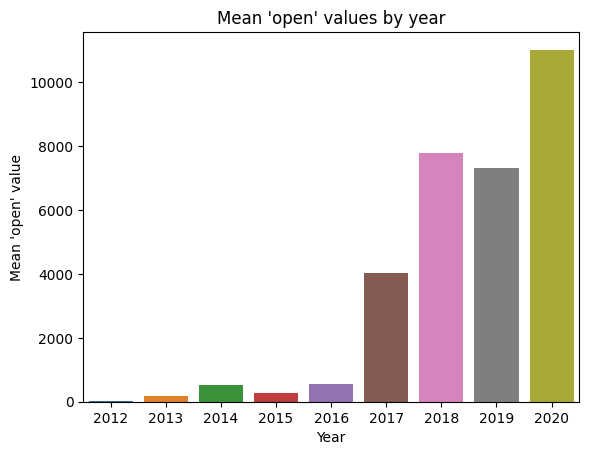

In [9]:
# Hint: sns.barplot(x='year',y='open',data=df_mean)
sns.barplot(x='year',y='open',data=df_mean)

plt.title("Mean 'open' values by year")
plt.xlabel("Year")
plt.ylabel("Mean 'open' value")

# Display the plot
plt.show()


### Q3. Visualize mean value of <code>close</code> yearly.

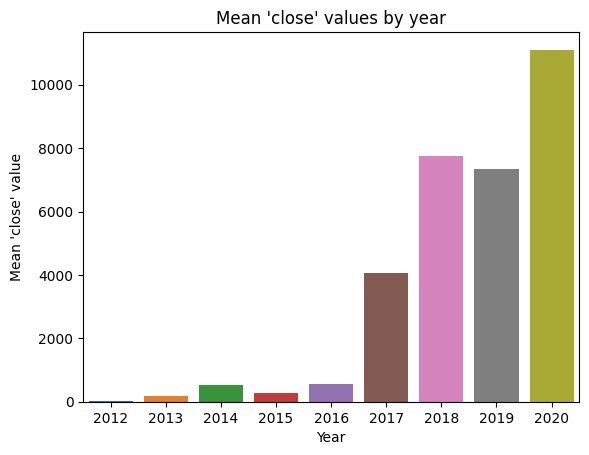

In [10]:
# Write your code here
sns.barplot(x='year',y='close',data=df_mean)

plt.title("Mean 'close' values by year")
plt.xlabel("Year")
plt.ylabel("Mean 'close' value")

# Display the plot
plt.show()


### Q4. groupby dataframe on year and find the median value.

In [11]:
# Write your code here
df_median = df.groupby('year', as_index=False).median()

# Print the resulting DataFrame
print(df_median)

   year      open     high       low     close  tick_volume  month   day
0  2012     6.800     7.10     6.510     6.700      46830.0    7.0  16.0
1  2013   111.300   116.44   106.000   112.250      17966.0    7.0  16.0
2  2014   501.210   517.00   477.300   501.220       8073.0    7.0  16.0
3  2015   246.000   251.99   241.090   245.970       7811.0    7.0  16.0
4  2016   577.960   582.05   573.040   576.850      17009.0    7.0  16.0
5  2017  2622.985  2743.55  2547.640  2640.920     445335.0    7.0  16.0
6  2018  7138.750  7421.45  6868.370  7148.500    1278851.5    6.0  16.0
7  2019  7815.950  8115.60  7483.790  7831.450    1302461.0    7.0  16.0
8  2020  9672.340  9887.64  9467.515  9683.635    1752751.0    7.0  16.0


C:\Users\HP\AppData\Local\Temp\ipykernel_19528\3941005774.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_median = df.groupby('year', as_index=False).median()


### Q5. Visualize median value of open yearly.

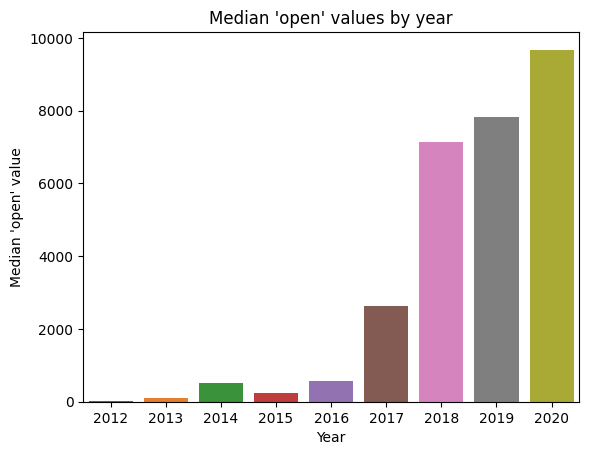

In [12]:
# Write your code here
sns.barplot(x='year',y='open',data=df_median)

plt.title("Median 'open' values by year")
plt.xlabel("Year")
plt.ylabel("Median 'open' value")

# Display the plot
plt.show()


### Q6. Visualize median value of close yearly.

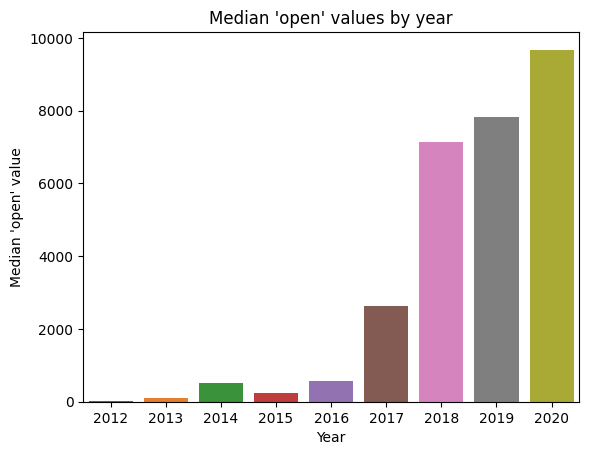

In [13]:
# Write your code here
sns.barplot(x='year',y='open',data=df_median)

plt.title("Median 'open' values by year")
plt.xlabel("Year")
plt.ylabel("Median 'open' value")

# Display the plot
plt.show()

## Model Development & Evaluation

### Splitting Dataset

In [18]:
# spliting training and testing data
from sklearn.model_selection import train_test_split
X = df1.drop('close', axis=1)

# Create y by selecting the 'close' column from the data DataFrame
y = df1['close']

# Use the train_test_split() function to split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
print(X_train.dtypes)
print(y_train.dtypes)

open           float64
high           float64
low            float64
tick_volume      int64
year             int64
month            int64
day              int64
dtype: object
float64


### Modeling & Evaluation

In [20]:
# Write your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()

# Fit the model on the training set
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 14195.940194388539
R-squared: 0.999246002570656


<details><summary><b>Click Here for the Hint</b></summary>

 

```
Here are the step-by-step instructions for the code:

Split the data into training and testing sets:

First, create X by dropping the 'close' column from the data DataFrame using the drop() method with axis=1.
Create y by selecting the 'close' column from the data DataFrame using indexing (e.g. data['close']).
Use the train_test_split() function from scikit-learn to split X and y into training and testing sets (e.g. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)).
test_size parameter specifies the proportion of the data to use for testing.
random_state parameter sets the random seed for reproducibility.

    
Train a linear regression model on the training set:

Create an instance of the LinearRegression() class from scikit-learn (e.g. lr_model = LinearRegression()).
Call the fit() method on the lr_model object, passing in X_train and y_train as arguments (e.g. lr_model.fit(X_train, y_train)).

    
Make predictions on the testing set:

Call the predict() method on the lr_model object, passing in X_test as an argument to make predictions on the testing set (e.g. y_pred = lr_model.predict(X_test)).

    
Evaluate the model's performance:

Calculate the mean squared error (MSE) between the predicted y values and the actual y values in the testing set using the mean_squared_error() function from scikit-learn (e.g. mse = mean_squared_error(y_test, y_pred)).
Calculate the R-squared (coefficient of determination) between the predicted y values and the actual y values in the testing set using the r2_score() function from scikit-learn (e.g. r2 = r2_score(y_test, y_pred)).
Print the results (e.g. print('Mean squared error:', mse) and print('R-squared:', r2)).

```

 

</details>